# preprocessing

In [3]:
import numpy as np
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt

In [4]:
train_dataset = h5py.File("datasets/train_catvnoncat.h5",'r')
test_dataset = h5py.File("datasets/test_catvnoncat.h5",'r')
images_train = np.array(train_dataset['train_set_x'][:])
labels_train = np.array(train_dataset['train_set_y'][:]).reshape(1,-1)
images_test = np.array(test_dataset['test_set_x'][:])
labels_test = np.array(test_dataset['test_set_y'][:]).reshape(1,-1)

In [5]:
print(images_train.shape , labels_train.shape , images_test.shape ,labels_test.shape,sep='\n')

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


- keras Sequentail accept input as feature row
- so we have to transpose the feature matrix 

In [6]:
X_train_m = images_train.T.reshape(-1,images_train.shape[0]).T
X_test_m = images_test.T.reshape(-1,images_test.shape[0]).T

In [7]:
X_train_ms =  X_train_m / 255
X_test_ms =  X_test_m / 255

In [8]:
X_train_ms.shape

(209, 12288)

# first manual logistic regression 
or neural net with one hidden unit

## modelling

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="sigmoid",input_shape=(12288,))
])

In [10]:
#adam = tf.keras.optimizers.Adam(learning_rate = 0.005)
gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.005)
model.compile(optimizer = gd , loss = "binary_crossentropy" , metrics = ["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12289     
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
summary_model = model.fit(X_train_ms , tf.squeeze(labels_train) , epochs = 2000 , validation_data=(X_test_ms,tf.squeeze(labels_test)))

Epoch 1/2000


7/7 [==============================] - 1s 58ms/step - loss: 0.8370 - accuracy: 0.5933 - val_loss: 0.6612 - val_accuracy: 0.6400
Epoch 2/2000
7/7 [==============================] - 0s 13ms/step - loss: 0.8757 - accuracy: 0.5359 - val_loss: 2.7523 - val_accuracy: 0.3400
Epoch 3/2000
7/7 [==============================] - 0s 14ms/step - loss: 1.1129 - accuracy: 0.5694 - val_loss: 0.8061 - val_accuracy: 0.3200
Epoch 4/2000
7/7 [==============================] - 0s 14ms/step - loss: 0.8134 - accuracy: 0.6316 - val_loss: 1.3296 - val_accuracy: 0.3400
Epoch 5/2000
7/7 [==============================] - 0s 13ms/step - loss: 0.6341 - accuracy: 0.6507 - val_loss: 0.6185 - val_accuracy: 0.7000
Epoch 6/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.6143 - accuracy: 0.6938 - val_loss: 0.8153 - val_accuracy: 0.3400
Epoch 7/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.5786 - accuracy: 0.6986 - val_loss: 1.4389 - val_accuracy: 0.3400
Epoch 8/200

Text(0.5, 1.0, 'test_accuracy')

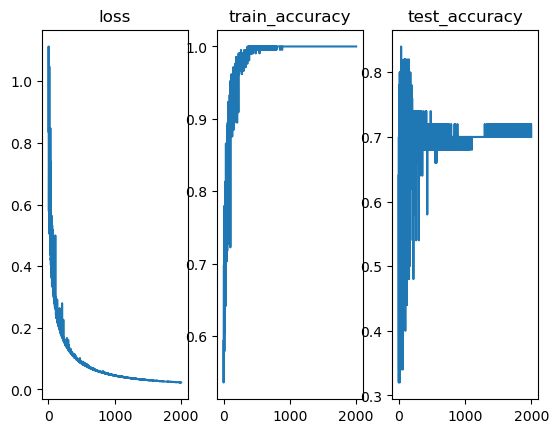

In [16]:
plt.Figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(summary_model.history["loss"])
plt.title("loss")
plt.subplot(1,3,2)
plt.plot(summary_model.history["accuracy"])
plt.title("train_accuracy")
plt.subplot(1,3,3)
plt.plot(summary_model.history["val_accuracy"])
plt.title("test_accuracy")

- this result is very simular to manual result

In [18]:
model_image = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=(64,64,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [19]:
gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.005)
model_image.compile(optimizer=gd,loss = "binary_crossentropy",metrics=['accuracy'])

In [20]:
model_image.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 64, 64, 3)         7         
 on)                                                             
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12289     
                                                                 
Total params: 12296 (48.04 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 7 (32.00 Byte)
_________________________________________________________________


In [21]:
summary_model_image = model_image.fit(images_train, tf.squeeze(labels_train) , epochs =200 , validation_data = (images_test , tf.squeeze(labels_test)))

Epoch 1/200
7/7 [==============================] - 1s 57ms/step - loss: 69671.1641 - accuracy: 0.4737 - val_loss: 54461.7383 - val_accuracy: 0.3400
Epoch 2/200
7/7 [==============================] - 0s 18ms/step - loss: 69296.3203 - accuracy: 0.5598 - val_loss: 67518.5781 - val_accuracy: 0.6600
Epoch 3/200
7/7 [==============================] - 0s 20ms/step - loss: 72079.1328 - accuracy: 0.5263 - val_loss: 167665.8750 - val_accuracy: 0.3400
Epoch 4/200
7/7 [==============================] - 0s 16ms/step - loss: 75578.5547 - accuracy: 0.5455 - val_loss: 17672.3770 - val_accuracy: 0.6800
Epoch 5/200
7/7 [==============================] - 0s 17ms/step - loss: 75328.9062 - accuracy: 0.5263 - val_loss: 112068.5625 - val_accuracy: 0.3400
Epoch 6/200
7/7 [==============================] - 0s 15ms/step - loss: 37967.2500 - accuracy: 0.6555 - val_loss: 91474.2578 - val_accuracy: 0.3400
Epoch 7/200
7/7 [==============================] - 0s 15ms/step - loss: 86863.7578 - accuracy: 0.5120 - val_lo

Text(0.5, 1.0, 'test_accuracy')

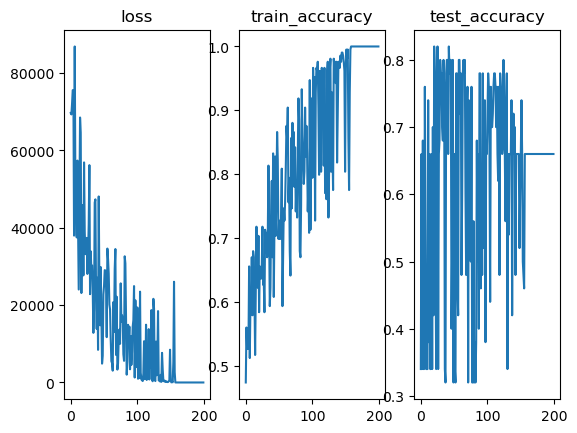

In [22]:
plt.Figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(summary_model_image.history["loss"])
plt.title("loss")
plt.subplot(1,3,2)
plt.plot(summary_model_image.history["accuracy"])
plt.title("train_accuracy")
plt.subplot(1,3,3)
plt.plot(summary_model_image.history["val_accuracy"])
plt.title("test_accuracy")

## evaluate

In [23]:
model_image.predict(images_test)
# i should fix it later 
# because it isnt predict probility 
# i think it should has a bug inside it 
# beacause i use tf.keras.layers.Sofwmax() for it but still didnt work 

2/2 [==============================] - 0s 15ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [24]:
model.predict(X_test_ms)

2/2 [==============================] - 0s 0s/step


array([[9.9403250e-01],
       [9.7903550e-01],
       [9.6149582e-01],
       [9.9582809e-01],
       [8.9223576e-01],
       [4.3388569e-01],
       [1.6143181e-03],
       [9.3640369e-01],
       [9.2723262e-01],
       [8.1348842e-01],
       [7.4679956e-02],
       [3.4644514e-01],
       [7.6055455e-01],
       [9.6361965e-01],
       [6.9526030e-04],
       [9.8905081e-01],
       [5.3291032e-03],
       [9.7890991e-01],
       [9.2520393e-02],
       [1.5352922e-03],
       [9.9508470e-01],
       [1.5068930e-01],
       [5.5888016e-04],
       [9.7191399e-01],
       [3.8306022e-01],
       [7.4251556e-01],
       [9.7168303e-01],
       [3.7236212e-04],
       [1.0385994e-03],
       [9.9994159e-01],
       [3.1765603e-02],
       [9.1384149e-01],
       [7.2551745e-01],
       [6.2687463e-01],
       [5.2526659e-01],
       [2.7071780e-03],
       [1.2481869e-02],
       [8.4752148e-01],
       [2.2209236e-01],
       [8.2861818e-03],
       [9.3612307e-01],
       [1.718847

# second shallow net 

In [25]:
shallow_net = tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation="tanh",input_shape=(12288,)),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [26]:
gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.0075)
shallow_net.compile(optimizer = gd ,loss="binary_crossentropy" , metrics=["accuracy"])

In [27]:
shallow_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36867     
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 36871 (144.03 KB)
Trainable params: 36871 (144.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history_shallow_net  = shallow_net.fit(X_train_ms,tf.squeeze(labels_train),epochs=1000,validation_data=(X_test_ms,tf.squeeze(labels_test)))

Epoch 1/1000
7/7 [==============================] - 1s 53ms/step - loss: 0.6767 - accuracy: 0.5742 - val_loss: 0.8071 - val_accuracy: 0.3600
Epoch 2/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.6500 - accuracy: 0.6555 - val_loss: 0.6097 - val_accuracy: 0.8000
Epoch 3/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.6607 - accuracy: 0.6172 - val_loss: 0.8565 - val_accuracy: 0.3600
Epoch 4/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.6384 - accuracy: 0.6507 - val_loss: 0.8993 - val_accuracy: 0.3600
Epoch 5/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.6429 - accuracy: 0.6555 - val_loss: 0.8792 - val_accuracy: 0.3400
Epoch 6/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.6177 - accuracy: 0.6794 - val_loss: 0.8331 - val_accuracy: 0.3400
Epoch 7/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.6304 - accuracy: 0.6603 - val_loss: 0.8892 - val_accuracy: 0.3400
Epoch 8/1000


Text(0.5, 1.0, 'test_accuracy')

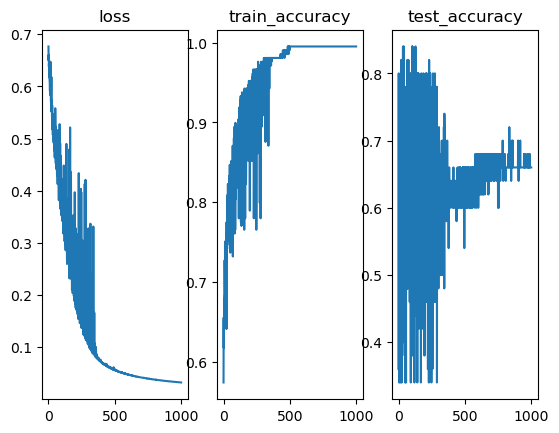

In [29]:
plt.Figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(history_shallow_net.history["loss"])
plt.title("loss")
plt.subplot(1,3,2)
plt.plot(history_shallow_net.history["accuracy"])
plt.title("train_accuracy")
plt.subplot(1,3,3)
plt.plot(history_shallow_net.history["val_accuracy"])
plt.title("test_accuracy")

In [36]:
shallow_net_image = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=[64,64,3]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [37]:
gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.0075)
shallow_net_image.compile(optimizer = gd ,loss="binary_crossentropy" , metrics=["accuracy"])

In [38]:
shallow_net_image.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 64, 64, 3)         7         
 tion)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 12288)             0         
                                                                 
 dense_7 (Dense)             (None, 3)                 36867     
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 36878 (144.06 KB)
Trainable params: 36871 (144.03 KB)
Non-trainable params: 7 (32.00 Byte)
_________________________________________________________________


In [41]:
tf.config.experimental_run_functions_eagerly(True)
history_shallow_net_image  = shallow_net_image.fit(images_train,tf.squeeze(labels_train),epochs=1000,validation_data=(images_test,tf.squeeze(labels_test)))

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
Epoch 1/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.9146 - accuracy: 0.4688

c:\Users\ARMA\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 0s 47ms/step - loss: 0.9567 - accuracy: 0.3541 - val_loss: 0.6469 - val_accuracy: 0.6600
Epoch 2/1000
7/7 [==============================] - 0s 43ms/step - loss: 0.9181 - accuracy: 0.3445 - val_loss: 0.6437 - val_accuracy: 0.6600
Epoch 3/1000
7/7 [==============================] - 0s 40ms/step - loss: 0.8921 - accuracy: 0.3445 - val_loss: 0.6418 - val_accuracy: 0.6600
Epoch 4/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.8681 - accuracy: 0.3445 - val_loss: 0.6411 - val_accuracy: 0.6600
Epoch 5/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.8467 - accuracy: 0.3445 - val_loss: 0.6413 - val_accuracy: 0.6600
Epoch 6/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.8273 - accuracy: 0.3445 - val_loss: 0.6424 - val_accuracy: 0.6600
Epoch 7/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.8099 - accuracy: 0.3445 - val_loss: 0.6443 - val_accuracy: 0.6600
Epoch 8/1000
7/7 [========

Text(0.5, 1.0, 'test_accuracy')

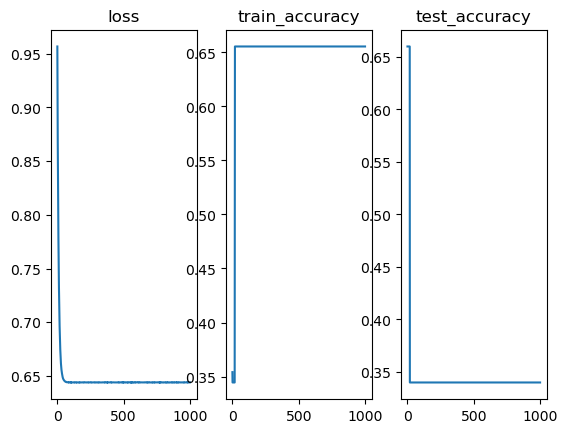

In [42]:
plt.Figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(history_shallow_net_image.history["loss"])
plt.title("loss")
plt.subplot(1,3,2)
plt.plot(history_shallow_net_image.history["accuracy"])
plt.title("train_accuracy")
plt.subplot(1,3,3)
plt.plot(history_shallow_net_image.history["val_accuracy"])
plt.title("test_accuracy")

In [43]:
shallow_net.predict(X_test_ms)

2/2 [==============================] - 0s 10ms/step


c:\Users\ARMA\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


array([[0.9894586 ],
       [0.9696634 ],
       [0.98731387],
       [0.99286926],
       [0.6994395 ],
       [0.5504172 ],
       [0.00718456],
       [0.96860147],
       [0.9834344 ],
       [0.8620859 ],
       [0.03782328],
       [0.609386  ],
       [0.926858  ],
       [0.9657538 ],
       [0.00675113],
       [0.98892933],
       [0.00707321],
       [0.98479605],
       [0.01961989],
       [0.00838645],
       [0.9946731 ],
       [0.03284185],
       [0.00722895],
       [0.973887  ],
       [0.22050197],
       [0.48082   ],
       [0.94480383],
       [0.00665902],
       [0.00882034],
       [0.9867006 ],
       [0.03257063],
       [0.96142256],
       [0.62448305],
       [0.2898101 ],
       [0.4376232 ],
       [0.0071556 ],
       [0.01089958],
       [0.9394134 ],
       [0.57158643],
       [0.01055845],
       [0.642959  ],
       [0.14981188],
       [0.6686325 ],
       [0.00722779],
       [0.98683715],
       [0.6202573 ],
       [0.04425424],
       [0.976

In [45]:
shallow_net_image.predict(images_test)
# as i expect it has a bug 
# maybe this idea is wrong 

2/2 [==============================] - 0s 10ms/step


c:\Users\ARMA\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


array([[0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.34692496],
       [0.346

# third deep net 

In [49]:
#20, 7, 5, 1
deepnet = tf.keras.Sequential([
    tf.keras.layers.Dense(20,activation="tanh",input_shape=(12288,)),
    tf.keras.layers.Dense(7,activation="tanh"),
    tf.keras.layers.Dense(5,activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

In [50]:
deepnet.compile(optimizer = gd , loss = "binary_crossentropy" , metrics = ["accuracy"])

In [52]:
deepnet.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 20)                245780    
                                                                 
 dense_14 (Dense)            (None, 7)                 147       
                                                                 
 dense_15 (Dense)            (None, 5)                 40        
                                                                 
 dense_16 (Dense)            (None, 1)                 6         
                                                                 
Total params: 245973 (960.83 KB)
Trainable params: 245973 (960.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
summary_deeonet = deepnet.fit(X_train_ms,tf.squeeze(labels_train),epochs = 1000 ,validation_data=(X_test_ms,tf.squeeze(labels_test)),verbose=True)

Epoch 1/1000
3/7 [===========>..................] - ETA: 0s - loss: 0.7082 - accuracy: 0.6250

c:\Users\ARMA\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 0s 62ms/step - loss: 0.6968 - accuracy: 0.6364 - val_loss: 0.7253 - val_accuracy: 0.3600
Epoch 2/1000
7/7 [==============================] - 0s 33ms/step - loss: 0.6346 - accuracy: 0.6507 - val_loss: 1.0229 - val_accuracy: 0.3400
Epoch 3/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.6328 - accuracy: 0.6555 - val_loss: 0.7145 - val_accuracy: 0.3600
Epoch 4/1000
7/7 [==============================] - 0s 46ms/step - loss: 0.6294 - accuracy: 0.6699 - val_loss: 0.9251 - val_accuracy: 0.3400
Epoch 5/1000
7/7 [==============================] - 0s 34ms/step - loss: 0.6132 - accuracy: 0.6603 - val_loss: 0.6890 - val_accuracy: 0.5400
Epoch 6/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.6195 - accuracy: 0.6699 - val_loss: 0.7431 - val_accuracy: 0.3200
Epoch 7/1000
7/7 [==============================] - 0s 46ms/step - loss: 0.5916 - accuracy: 0.6794 - val_loss: 0.6226 - val_accuracy: 0.7200
Epoch 8/1000
7/7 [========

Text(0.5, 1.0, 'test_accuracy')

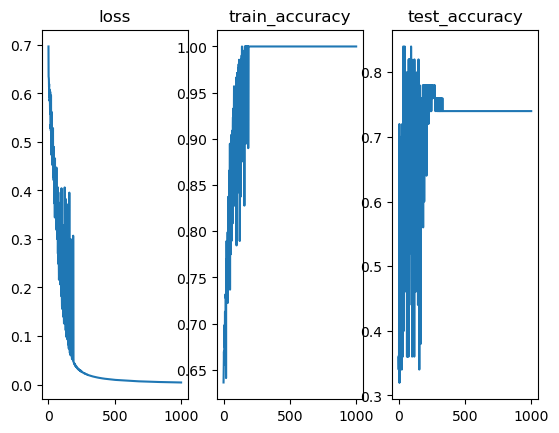

In [54]:
plt.Figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(summary_deeonet.history["loss"])
plt.title("loss")
plt.subplot(1,3,2)
plt.plot(summary_deeonet.history["accuracy"])
plt.title("train_accuracy")
plt.subplot(1,3,3)
plt.plot(summary_deeonet.history["val_accuracy"])
plt.title("test_accuracy")